In [1]:
# Code aus "Neuronale Netze selbst programmieren,
# ein verständlicher Einstieg mit Python"
# von Tariq Rashid , O'Reilly
# license GPLv2

import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot 
%matplotlib inline
import os
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob
# Importing cv2 // !pip install opencv-python
import cv2
# import random to shuffle array for training
import random

In [2]:
# neural network class definition
class neuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each inpzt, hidden oputput layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # learning rate
        self.lr = learningrate

        # link weight matrices, wih and who 
        # weights inside the arrays aer w_i_j, where link is from node i to node j in the next layer
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # acitivation function is the sigmoid funciton
        self.activation_function = lambda x: scipy.special.expit(x)
    
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer        
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)      
        
        # calculate signals final output layer        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [3]:
# number of input, hidden and output nodes
imageAxis = 360
input_nodes = imageAxis**2
hidden_nodes = 1000
output_nodes = 2

# learning rate
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# https://stackoverflow.com/questions/7165749/open-file-in-a-relative-location-in-python
# relative path to files
fileDir = os.path.dirname(os.path.realpath('__file__'))
# For accessing the file in the parent folder of the current folder
# small test data for quick calculations
training_data_path = os.path.join(fileDir, '../../trainingdata/testdata/train_small/*.jpg') 
test_data_path = os.path.join(fileDir, '../../trainingdata/testdata/test_small/*.jpg') 
# real test data (60'000 training data / 10'000 test data)


In [5]:
# load training data in a list
training_data_list = []

# load all images from the folder
for image_file_name in glob.glob(training_data_path):
    
    # get image from path
    originalImage = cv2.imread(image_file_name)
    # resize the image with openCv2
    resizedImage = cv2.resize(originalImage, (imageAxis, imageAxis), interpolation=cv2.INTER_NEAREST)
    # gray the image
    resizedGrayImage = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2GRAY)
    
    # use the filename to set the correct label
    if image_file_name.__contains__('cat.'):
        labelCatOrDog = 0
    else:
        labelCatOrDog = 1
    
    # load image data into an array
    print ("loading ... ", image_file_name)
    img_array = resizedGrayImage.flatten()
    
    # reshape from resized to input_nodes value, invert values
    img_data  = 255.0 - img_array.reshape(input_nodes)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    # append label and image data training data set
    record = numpy.append(labelCatOrDog,img_data)
    training_data_list.append(record)
    print(record)
    pass

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.0.jpg
[0.         0.35164706 0.35164706 ... 0.99223529 0.99223529 0.99223529]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.1.jpg
[0.         0.83694118 0.83694118 ... 0.84082353 0.868      0.87576471]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.10.jpg
[0.         0.88352941 0.89129412 ... 0.36717647 0.406      0.41764706]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.11.jpg
[0.         0.07211765 0.08764706 ... 0.19635294 0.17694118 0.16141176]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.12.jpg
[0.         0.70105882 0.70105882 ... 0.28952941 0.28564706 0.28176471]
loading ...  C:\U

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.9071.jpg
[0.         0.72823529 0.72823529 ... 0.28176471 0.28952941 0.28952941]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.9072.jpg
[0.         0.84082353 0.83694118 ... 0.84858824 0.85247059 0.85635294]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.9073.jpg
[0.         0.62341176 0.62729412 ... 0.37882353 0.406      0.39823529]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.9074.jpg
[0.         0.75152941 0.63117647 ... 0.26235294 0.24682353 0.23905882]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\cat.9075.jpg
[0.         0.43705882 0.43705882 ... 0.46035294 0.46035294 0.46423529]
loadi

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.4155.jpg
[1.         0.71270588 0.74376471 ... 0.56129412 0.736      0.71270588]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.4156.jpg
[1.         0.87576471 0.87576471 ... 0.83305882 0.86023529 0.87576471]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.4157.jpg
[1.         0.604      0.58847059 ... 0.41376471 0.40211765 0.44482353]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.4158.jpg
[1.         0.75541176 0.74764706 ... 0.51470588 0.39823529 0.37494118]
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/train_small\dog.4159.jpg
[1.         0.472      0.472      ... 0.91458824 0.91070588 0.91070588]
loadi

In [6]:
# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 1

for e in range(epochs):
    # shuffel the training_data_list so we do not go: cat cat cat ... dog dog dog
    random.shuffle(training_data_list)
    
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        # 
        inputs = record[1:]
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(record[0])] = 0.99
        n.train(inputs, targets)
        print("trained a picture ", targets)
        pass
    pass

trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.99 0.01]
trained a picture  [0.01 0.99]
trained a picture  [0.01 0.99]
trained a picture  [0.01 0.99]
trained 

In [7]:
# load test data in a list
test_data_list = []

# load all images from the folder
for image_file_name in glob.glob(test_data_path):
    
    # get image from path
    originalImage = cv2.imread(image_file_name)
    # resize the image with openCv2
    resizedImage = cv2.resize(originalImage, (imageAxis, imageAxis), interpolation=cv2.INTER_NEAREST)
    # gray the image
    resizedGrayImage = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2GRAY)
    
    # use the filename to set the correct label
    if image_file_name.__contains__('cat.'):
        labelCatOrDog = 0
    else:
        labelCatOrDog = 1
    
    # load image data into an array
    print ("loading ... ", image_file_name)
    img_array = resizedGrayImage.flatten()
    
    # reshape from resized to input_nodes value, invert values
    img_data  = 255.0 - img_array.reshape(input_nodes)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    # append label and image data training data set
    record = numpy.append(labelCatOrDog,img_data)
    test_data_list.append(record)
    
    pass

loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.141.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.142.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.143.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.146.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\cat.147.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\dog.7696.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\dog.7697.jpg
loading ...  C:\Users\schmi\Documents\CatDog-Python\CatDog-Python\Project\../../trainingdata/testdata/test_small\dog.7698.j

In [8]:
# test the neural network
# scorecard for how well the network performs
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # correct answer is first value
    correct_label = int(record[0])
    inputs = record[1:]
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass
print(scorecard)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [9]:
# calculate the performance score (correct answers/ all answers)
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.5


[[1.00000000e+00]
 [9.38666133e-11]]
network says  0
match!


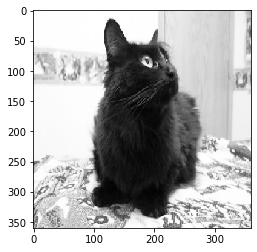

In [10]:
# test the neural network with the test image but only one and show the image

# record to test
item = 4

# plot image
matplotlib.pyplot.imshow(test_data_list[item][1:].reshape(imageAxis,imageAxis), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = test_data_list[item][0]
# data is remaining values
inputs = test_data_list[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

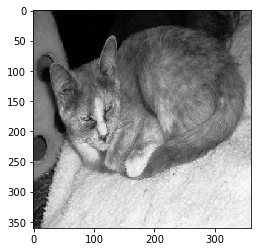

In [11]:
# plot image
matplotlib.pyplot.imshow(training_data_list[5][1:].reshape(imageAxis,imageAxis), cmap='Greys', interpolation='None')
